In [42]:
import pandas as pd
import numpy as np


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [43]:
train.shape

(42000, 785)

In [44]:
X = train.drop('label', axis=1)
X.shape

(42000, 784)

In [45]:
y = train['label']
y.shape

(42000,)

In [46]:
test.shape

(28000, 784)

In [47]:
len(train.iloc[1, 1:].values)
train.iloc[1, 1:].values.reshape(28,28).shape

train.iloc[1]

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 785, dtype: int64

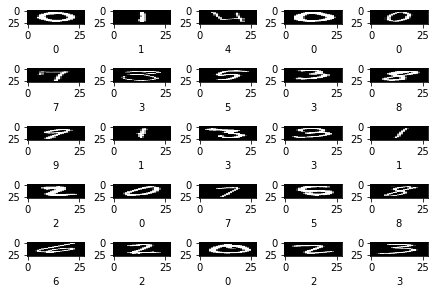

In [17]:

# plot digital
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

for i in range(1, 26):
    plt.subplot(5,5,i)
    row = train.iloc[i, 1:].values.reshape(28,28)
    plt.imshow(row, cmap=plt.get_cmap('gray'), aspect='auto')
    plt.xlabel(train.iloc[i,0])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    



In [18]:
from keras.utils import to_categorical
to_categorical(y, num_classes=10)


Using TensorFlow backend.


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [19]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X = train.drop('label', axis=1)
y = to_categorical(train['label'], num_classes=10)


model.fit(X, y)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
42000/42000 [==============================] - 4s 99us/step - loss: 1.6504 - acc: 0.7836


In [20]:
pred=model.predict(test)
pred.shape



(28000, 10)

In [74]:
result = [np.argmax(y, axis=None, out=None) for y in pred]
len(result)
i = list(range(1, len(result)+1))

d={'ImageId': i, 'Label': result}

df = pd.DataFrame(d)
df.to_csv('./result.csv', index=False)

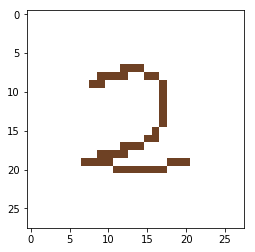

In [77]:
import matplotlib.image as mpimg
img=mpimg.imread('./test.png')
imgplot = plt.imshow(img)
plt.show()


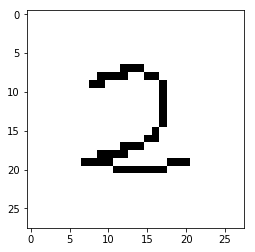

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [48]:
import numpy as np
import cv2 
import csv 
import matplotlib.pyplot as plt

img = cv2.imread('./test.png', 0) # load grayscale image. Shape (28,28)

flattened = img.flatten() # flatten the image, new shape (784,)

# flattened = np.insert(flattened, 0, 2) # insert the label at the beginning of the array, in this case we add a 0 at the index 0. Shape (785,0)

row = flattened.reshape(28,28)

plt.imshow(row, cmap=plt.get_cmap('gray'))
plt.show()

flattened



In [39]:
# model.predict(flattened)
reflattened = flattened.reshape(1,784)
reflattened.shape
model.predict(reflattened)

result = [np.argmax(y, axis=None, out=None) for y in reflattened]
result

[0]